In [1]:
import pyarrow.feather as feather
import numpy as np
import pandas as pd
import json
import os
from oedisi.types.data_types import Topology




In [3]:
directory = "../outputs/ieee123"
voltage_real = feather.read_feather(
    os.path.join(directory, "voltage_real.feather")
)
voltage_imag = feather.read_feather(
    os.path.join(directory, "voltage_imag.feather")
)

with open(os.path.join(directory, "topology.json")) as f:
    topology = Topology.parse_obj(json.load(f))
    base_voltage_df = pd.DataFrame(
        {
            "id": topology.base_voltage_magnitudes.ids,
            "value": topology.base_voltage_magnitudes.values,
        }
    )
    base_voltage_df.set_index("id", inplace=True)
    base_voltages = base_voltage_df["value"]

true_voltages = voltage_real.drop("time", axis=1) + 1j * voltage_imag.drop(
    "time", axis=1
)
true_voltages["time"] = voltage_real["time"]
true_voltages.set_index("time", inplace=True)

voltage_mag = feather.read_feather(os.path.join(directory, "voltage_mag.feather"))
estimated_time = voltage_mag["time"]
voltage_mag.drop("time", axis=1)
# voltage_angle = feather.read_feather(
#     os.path.join(directory, "voltage_angle.feather")
# ).drop("time", axis=1)

# estimated_voltages = voltage_mag * np.exp(1j * voltage_angle)
# estimated_voltages["time"] = estimated_time
# estimated_voltages.set_index("time", inplace=True)

# time_intersection = pd.merge(
#     true_voltages, estimated_voltages, left_index=True, right_index=True
# ).index.to_numpy()

# estimated_voltages = estimated_voltages.loc[time_intersection, :]
# true_voltages = true_voltages.loc[time_intersection, :]

# estimated_voltages = estimated_voltages.reindex(true_voltages.columns, axis=1)



,150.1,150.2,150.3,150R.1,150R.2,150R.3,149.1,149.2,149.3,1.1,...,61S.1,61S.2,61S.3,300_OPEN.1,300_OPEN.2,300_OPEN.3,94_OPEN.1,610.1,610.2,610.3
0,2401.761414,2401.768952,2401.766632,2476.810684,2476.821204,2476.817955,2476.810226,2476.820898,2476.817574,2454.970466,...,2384.149808,2451.902492,2412.788845,2380.954188,2443.246794,2405.975005,2397.888743,276.634816,279.528788,280.221730
1,2401.761761,2401.769216,2401.766858,2476.811167,2476.821572,2476.818270,2476.810715,2476.821270,2476.817892,2455.338520,...,2386.072153,2452.792971,2413.718296,2382.386785,2443.764622,2406.567356,2399.337211,276.803704,279.674868,280.338834
2,2401.761964,2401.769350,2401.767013,2476.811451,2476.821758,2476.818486,2476.811002,2476.821458,2476.818111,2455.534373,...,2387.056209,2453.216655,2414.494951,2383.147665,2444.028804,2407.060804,2400.099384,276.906198,279.748830,280.414635
3,2401.762168,2401.769483,2401.767168,2476.811735,2476.821944,2476.818702,2476.811289,2476.821646,2476.818329,2455.730147,...,2388.039939,2453.640256,2415.271558,2383.908314,2444.292920,2407.554238,2400.861293,277.008669,279.822782,280.490415
4,2401.762371,2401.769616,2401.767322,2476.812018,2476.822130,2476.818918,2476.811575,2476.821833,2476.818548,2455.925842,...,2389.023344,2454.063774,2416.048119,2384.668733,2444.556972,2408.047659,2401.622941,277.111116,279.896725,280.566175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2401.758620,2401.766398,2401.764562,2476.806826,2476.817677,2476.815101,2476.806426,2476.817420,2476.814769,2455.309260,...,2386.422335,2444.130042,2415.662639,2380.260155,2441.365325,2408.951019,2399.708411,276.726061,279.562504,279.809833
92,2401.758620,2401.766398,2401.764562,2476.806826,2476.817677,2476.815101,2476.806426,2476.817420,2476.814769,2455.309260,...,2386.422335,2444.130042,2415.662639,2380.260155,2441.365325,2408.951019,2399.708411,276.726061,279.562504,279.809833
93,2401.758620,2401.766398,2401.764562,2476.806826,2476.817677,2476.815101,2476.806426,2476.817420,2476.814769,2455.309260,...,2386.422335,2444.130042,2415.662639,2380.260155,2441.365325,2408.951019,2399.708411,276.726061,279.562504,279.809833
94,2401.758620,2401.766398,2401.764562,2476.806826,2476.817677,2476.815101,2476.806426,2476.817420,2476.814769,2455.309260,...,2386.422335,2444.130042,2415.662639,2380.260155,2441.365325,2408.951019,2399.708411,276.726061,279.562504,279.809833


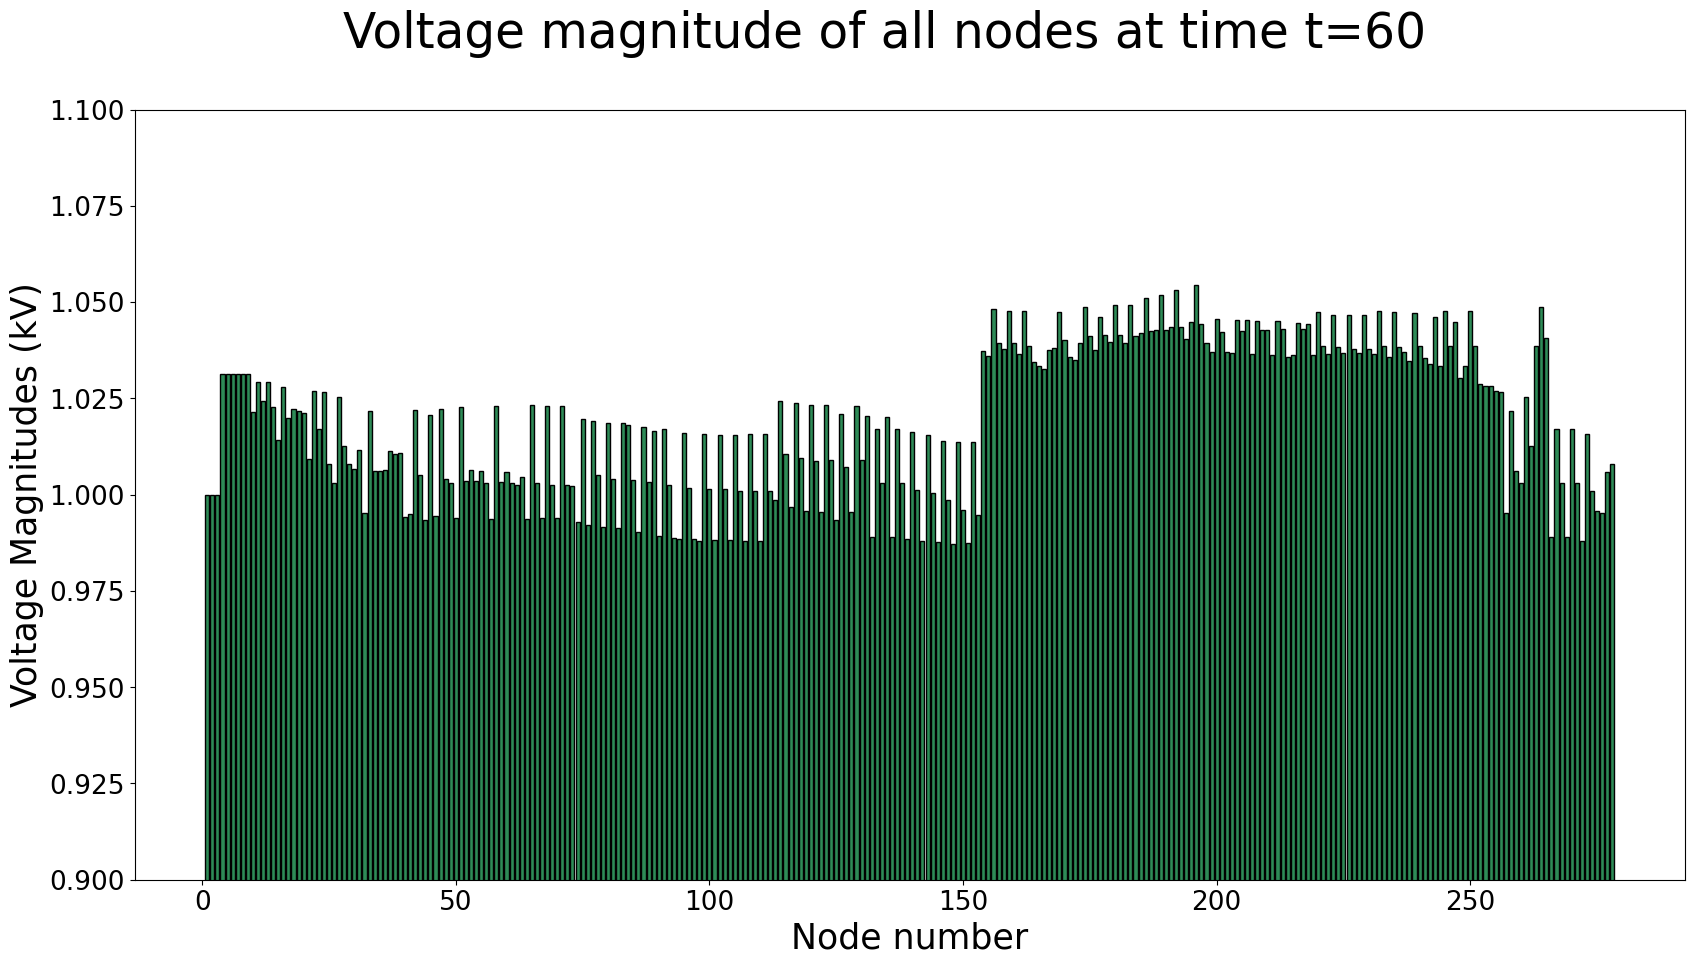

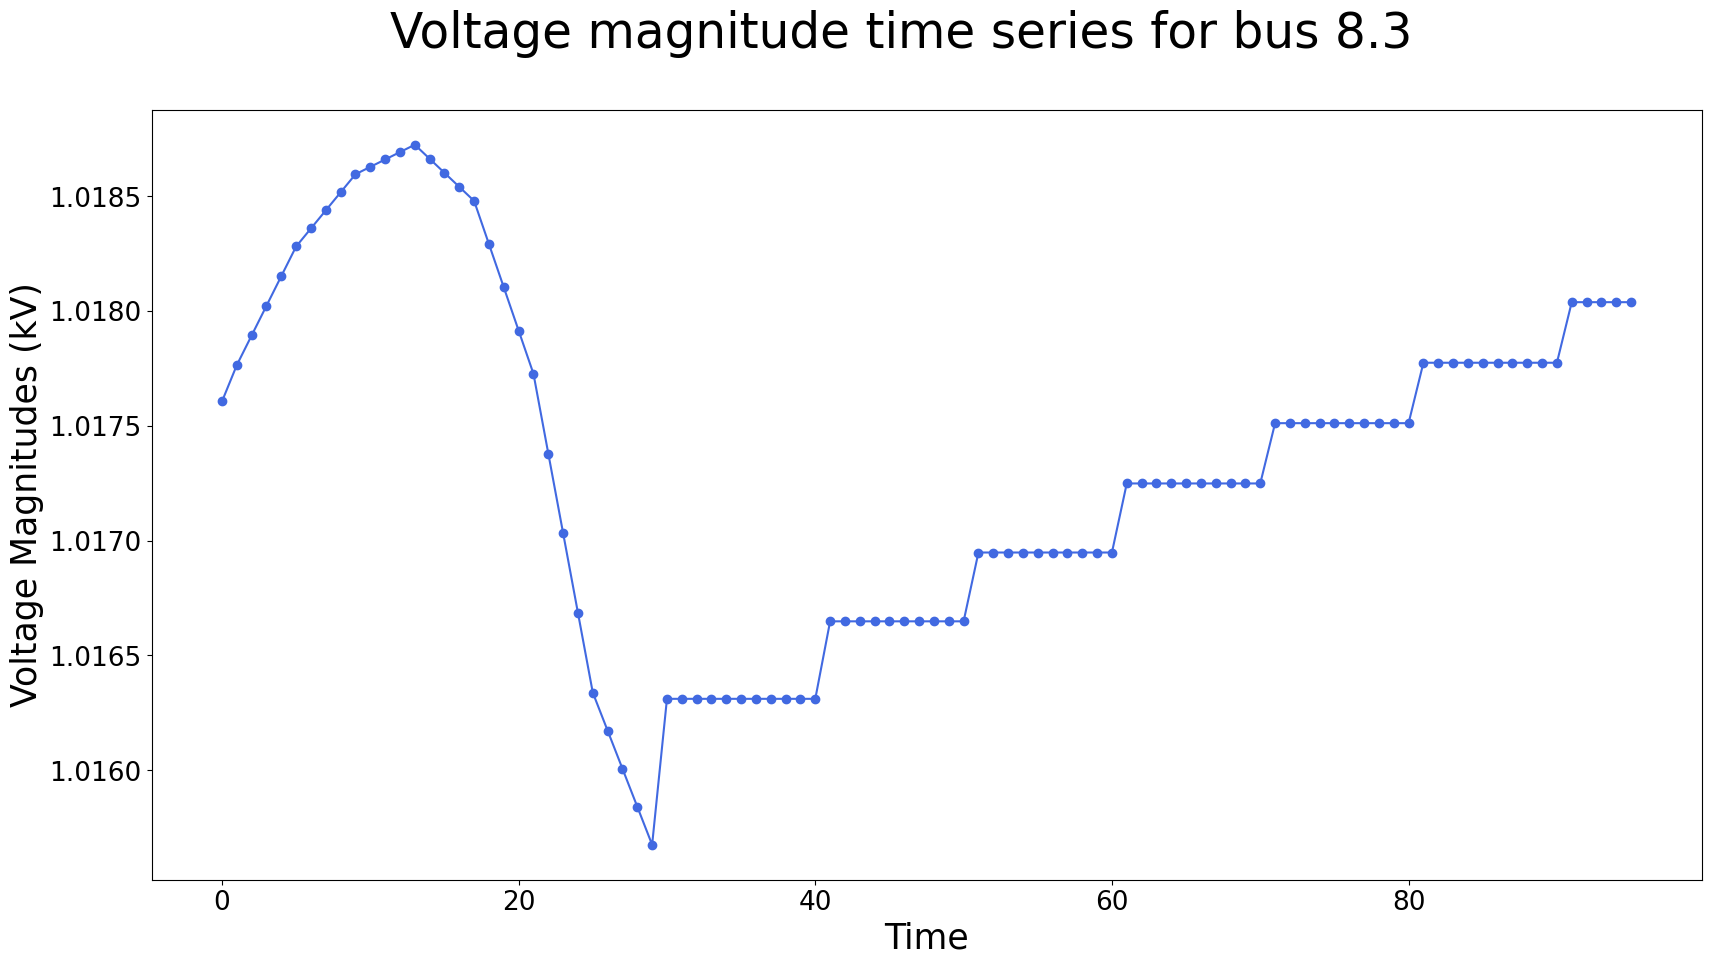

In [62]:
import matplotlib.pyplot as plt

def compare_voltages(
        df_opf_voltages, df_true_voltages, base_voltages,
        bus=None, time=0, unit="kV", 
        **kwargs
        ):
    
    # keyword arguments
    label_fontsize = kwargs.get('fontsize', 25)
    legend_fontsize = label_fontsize + 2
    ticklabel_fontsize = label_fontsize - 2
    title_fontsize = label_fontsize + 10

    # common bus or common time: if bus=None, then plot for common time
    if not bus:
        opf_voltages = df_opf_voltages.iloc[time,:]
        true_voltages = df_true_voltages.iloc[time,:] / base_voltages
        xlabel = "Node number"
        suptitle = f"Voltage magnitude comparison at t={time}"
    else:
        opf_voltages = df_opf_voltages[bus]
        true_voltages = df_true_voltages[bus] / base_voltages[bus]
        xlabel = "Time"
        suptitle = f"Voltage magnitude comparison for bus {bus}"
        

    # Plot the comparison
    fig, ax = plt.subplots(figsize=(20, 10))
    x_axis = np.arange(true_voltages.shape[0])
    ax.plot(x_axis, opf_voltages, "-o", color="crimson")
    ax.plot(x_axis, true_voltages, "-o", color="royalblue")
    # Formatting
    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel(f"Voltage Magnitudes ({unit})", fontsize=label_fontsize)
    ax.legend(["OPF estimated voltages", "True voltages"], 
              fontsize=legend_fontsize, markerscale=2)
    ax.tick_params(axis="x", labelsize=ticklabel_fontsize)
    ax.tick_params(axis="y", labelsize=ticklabel_fontsize)
    fig.suptitle(suptitle, fontsize=title_fontsize)
    return fig

def plot_voltages(
        df_voltages, base_voltages, 
        bus=None, time=0, unit="kV", 
        **kwargs
        ):
    # keyword arguments
    label_fontsize = kwargs.get('fontsize', 25)
    ticklabel_fontsize = label_fontsize - 6
    title_fontsize = label_fontsize + 10

    # common bus or common time: if bus=None, then plot for common time
    fig, ax = plt.subplots(figsize=(20, 10))
    if not bus:
        voltages = df_voltages.iloc[time,:] / base_voltages
        xlabel = "Node number"
        suptitle = f"Voltage magnitude of all nodes at time t={time}"
        x_axis = np.arange(voltages.shape[0]) + 1
        ax.bar(x_axis, voltages, color='seagreen', edgecolor='black')
        ax.set_ylim(0.9,1.1)
    else:
        voltages = df_voltages[bus] / base_voltages[bus]
        xlabel = "Time"
        suptitle = f"Voltage magnitude time series for bus {bus}"
        x_axis = np.arange(voltages.shape[0])
        ax.plot(x_axis, voltages, "-o", color="royalblue")
    
    
    
    # Formatting
    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel(f"Voltage Magnitudes ({unit})", fontsize=label_fontsize)
    ax.tick_params(axis="x", labelsize=ticklabel_fontsize)
    ax.tick_params(axis="y", labelsize=ticklabel_fontsize)
    fig.suptitle(suptitle, fontsize=title_fontsize)
    return fig


# opf_voltages = feather.read_feather(
#     os.path.join(directory, 
#                  "opf_voltage_mag.feather")
#                  ).drop("time", axis=1)
true_voltages = np.abs(voltage_real.drop("time", axis=1) + 1j * voltage_imag.drop("time", axis=1))

fig = plot_voltages(
    true_voltages, base_voltages, 
    time=60
    )

fig = plot_voltages(
    true_voltages, base_voltages, 
    bus='8.3'
    )

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm



def plot_network(
        topology: Topology,
        df_voltages:pd.DataFrame,
        time=[30, 60, 90], vmin=1.0, vmax=1.05,
        **kwargs
        ) -> None:
    # keyword arguments
    ncols = kwargs.get('ncols', 3)
    nrows = kwargs.get('nrows', 1)
    figsize = kwargs.get('figsize', (30, 10))
    constrained_layout = kwargs.get('constrained_layout', False)
    node_size = kwargs.get('node_size',50)
    label_fontsize = kwargs.get('fontsize', 25)
    ticklabel_fontsize = label_fontsize - 2
    title_fontsize = label_fontsize + 10
    print(node_size)

    # networkx graph
    network = nx.Graph()
    from_equip = topology.admittance.from_equipment
    to_equip = topology.admittance.to_equipment
    cmap = plt.cm.plasma

    # add the edges to construct the networkx graph
    for fr_eq, to_eq in zip(from_equip, to_equip):
        [from_name, from_phase] = fr_eq.split('.')
        if from_name.find('OPEN') != -1:
            [from_name, _] = from_name.split('_')

        [to_name, to_phase] = to_eq.split('.')
        if to_name.find('OPEN') != -1:
            [to_name, _] = to_name.split('_')

        if from_name == to_name:
            continue

        # network.add_edge(from_name, to_name)
        network.add_edge(fr_eq, to_eq)
    
    gcc = network.subgraph(
        sorted(nx.connected_components(network), key=len, reverse=True)[0])
    pos = nx.spring_layout(gcc, seed=2023, iterations=500)

    # Plotting
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize, constrained_layout=constrained_layout)
    for i,t in enumerate(time):
        voltages = df_voltages.iloc[t,:] / base_voltages
        n_colors = [voltages[n] for n in gcc.nodes]
        
        
        # Draw the network
        nx.draw_networkx_nodes(
            gcc, pos, ax=axs[i],
            node_size=node_size, node_color=n_colors, cmap=cmap, 
            vmin=vmin,vmax=vmax,
            )
        nx.draw_networkx_edges(gcc, pos, alpha=0.1,edge_color='k', ax=axs[i])
        # nx.draw_networkx_labels(gcc, pos, font_size=2, ax=axs[i])

        axs[i].set_title(f"Time step: t={t}", fontsize=label_fontsize)

    # Colorbar
    cobj = cm.ScalarMappable(cmap=cmap)
    cobj.set_clim(vmin=vmin, vmax=vmax)
    fig.subplots_adjust(bottom=0.2)
    cbar_ax = fig.add_axes([0.15, 0.1, 0.72, 0.05])
    cbar = fig.colorbar(cobj, cax=cbar_ax, orientation= 'horizontal')
    # cbar = fig.colorbar(cobj, ax=axs[0], orientation= 'horizontal', pad=0.05)
    cbar.set_label("Voltage Magnitude (p.u.)", size=label_fontsize)
    cbar.ax.tick_params(labelsize = ticklabel_fontsize)

    suptitle = "Voltage magnitude heatmaps at time steps t="+','.join([str(i) for i in time])
    fig.suptitle(suptitle, fontsize=title_fontsize)
    
    return fig




50


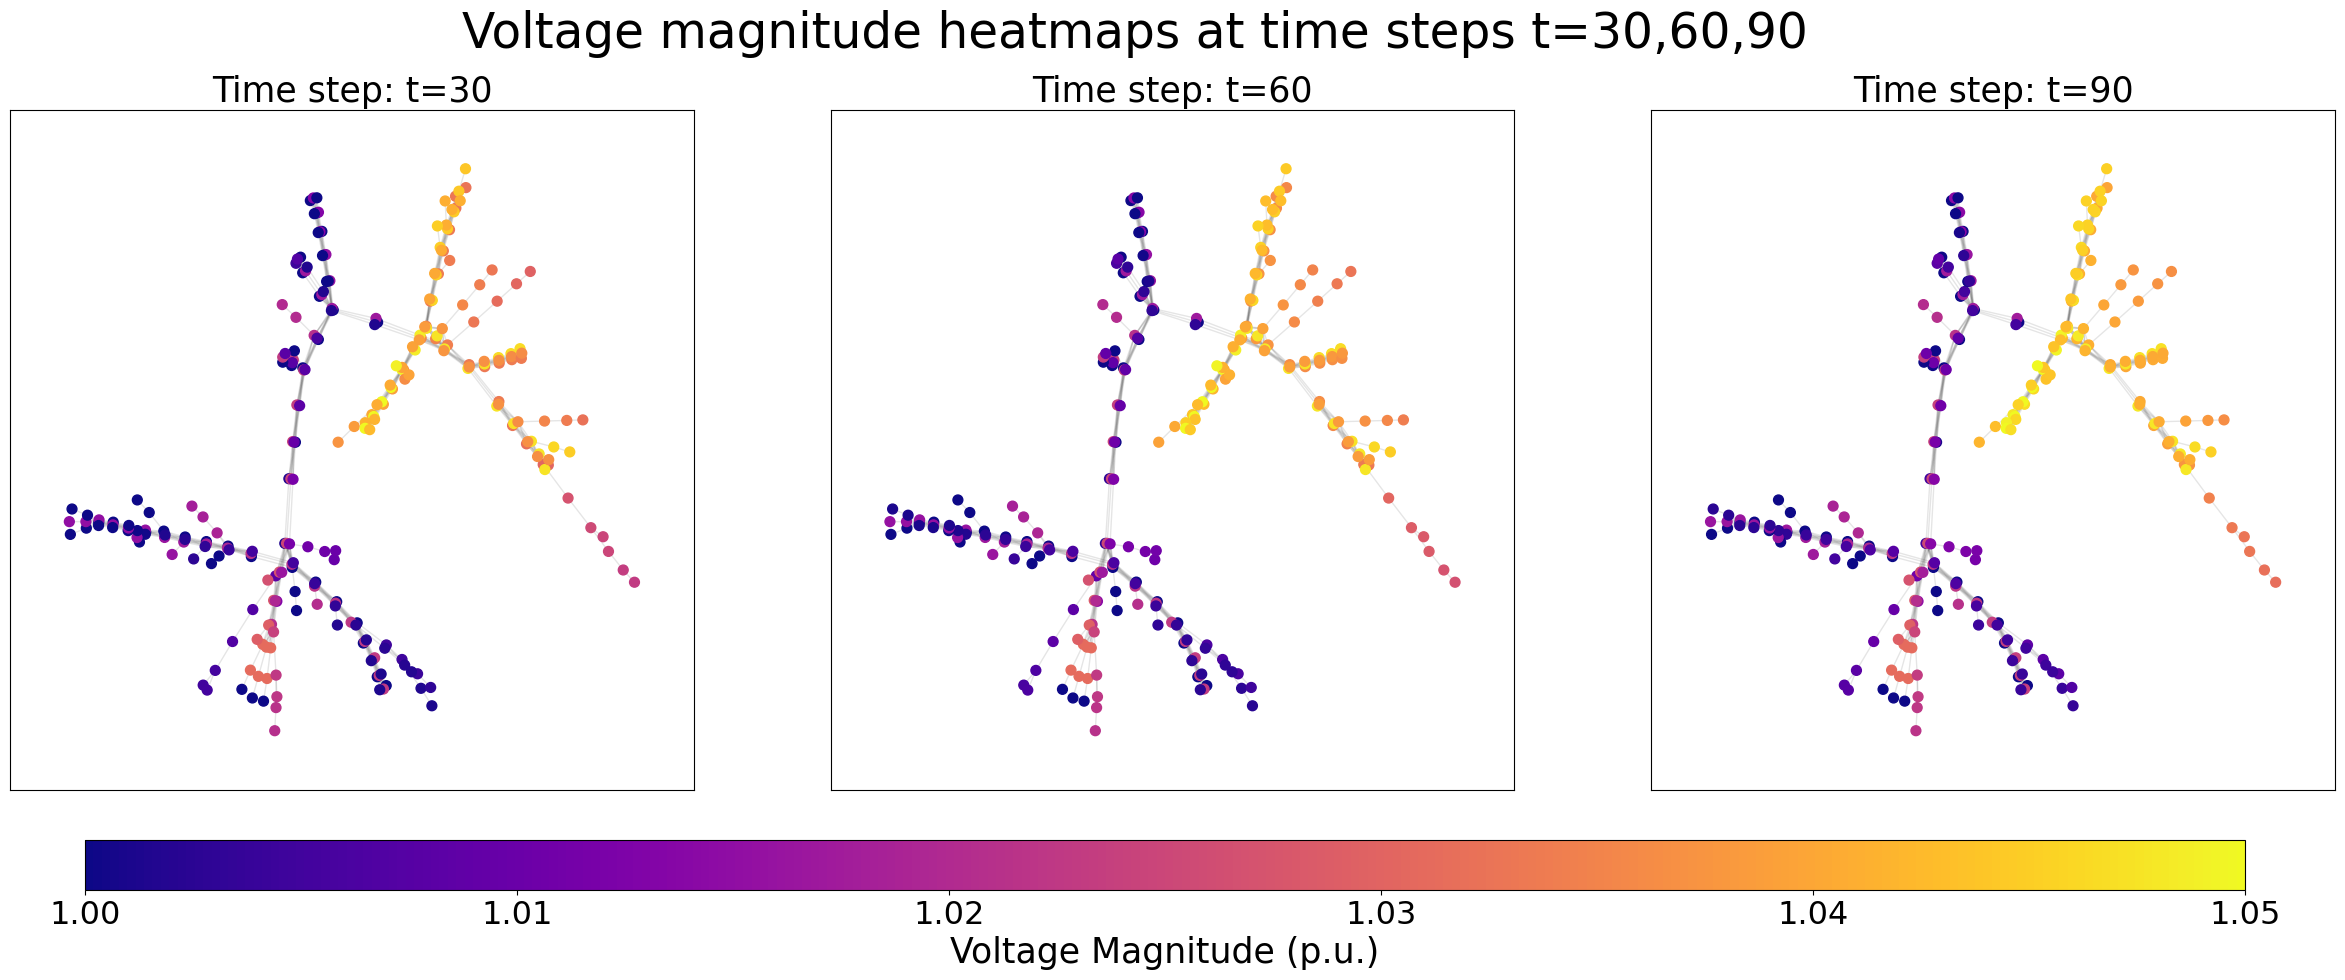

In [7]:
import pyarrow.feather as feather
import numpy as np
import json
import os
import pandas as pd
from oedisi.types.data_types import Topology

directory = "../outputs/ieee123"
# get topology data
with open(os.path.join(directory, "topology.json")) as f:
    topology = Topology.parse_obj(json.load(f))

    base_voltage_df = pd.DataFrame(
        {
            "id": topology.base_voltage_magnitudes.ids,
            "value": topology.base_voltage_magnitudes.values,
        }
    )
    base_voltage_df.set_index("id", inplace=True)
    base_voltages = base_voltage_df["value"]


# get voltage data
voltage_real = feather.read_feather(
    os.path.join(directory, "voltage_real.feather")
)
voltage_imag = feather.read_feather(
    os.path.join(directory, "voltage_imag.feather")
)
true_voltages = np.abs(voltage_real.drop("time", axis=1) + 1j * voltage_imag.drop("time", axis=1))

time = [30,60,90]
fig = plot_network(topology, true_voltages, time=time, node_size=50)
fig.savefig(os.path.join(directory, "network_ieee123.png"), bbox_inches='tight')

20000


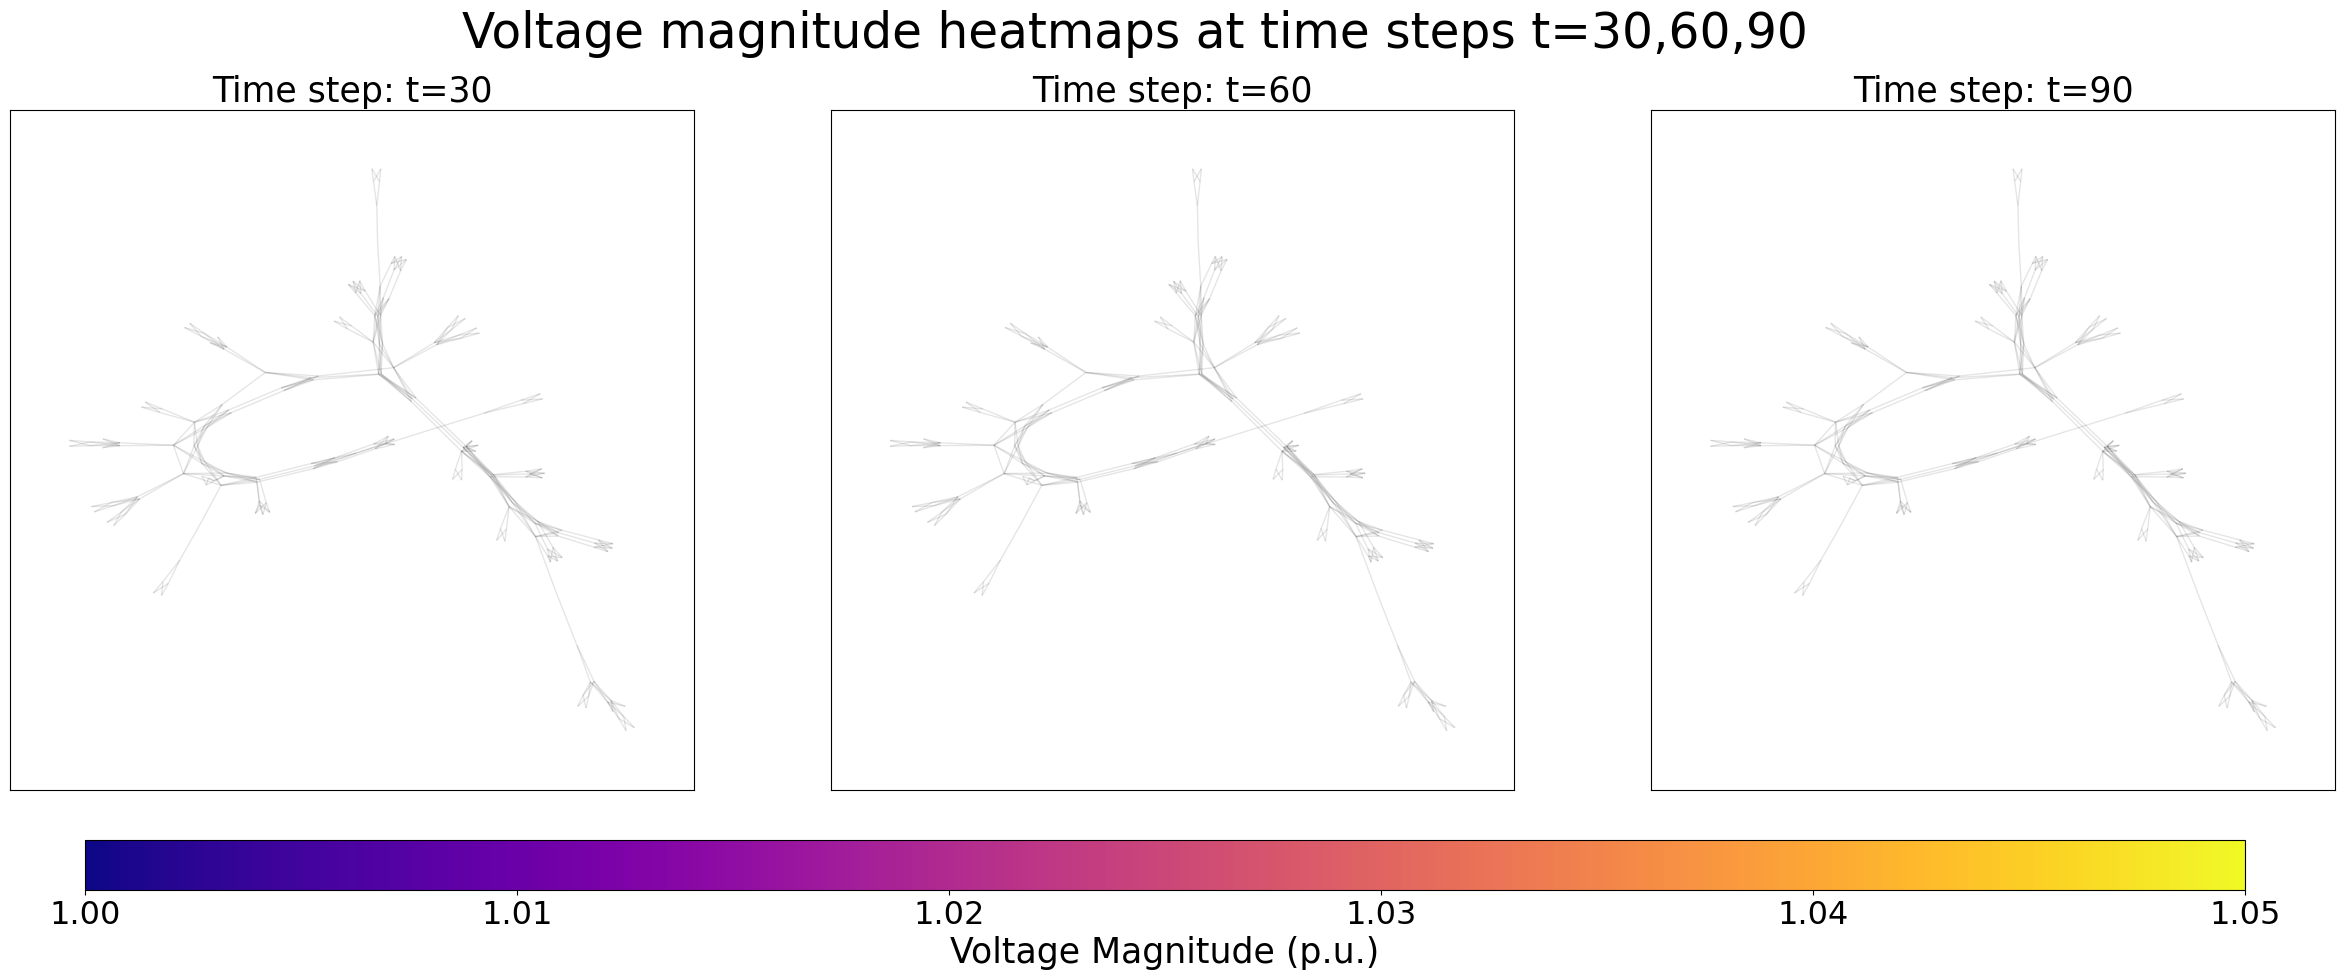

In [8]:
import pyarrow.feather as feather

directory = "../outputs/small"
# get topology data
with open(os.path.join(directory, "topology.json")) as f:
    topology = Topology.parse_obj(json.load(f))


# get voltage data
voltage_real = feather.read_feather(
    os.path.join(directory, "voltage_real.feather")
)
voltage_imag = feather.read_feather(
    os.path.join(directory, "voltage_imag.feather")
)
true_voltages = np.abs(voltage_real.drop("time", axis=1) + 1j * voltage_imag.drop("time", axis=1))

time = [30,60,90]
fig = plot_network(topology, true_voltages, time=time, node_size=20000)
fig.savefig(os.path.join(directory, "network_small.png"), bbox_inches='tight')

In [ ]:
directory = "../outputs/large"
# get topology data
with open(os.path.join(directory, "topology.json")) as f:
    topology = Topology.parse_obj(json.load(f))


# get voltage data
voltage_real = feather.read_feather(
    os.path.join(directory, "voltage_real.feather")
)
voltage_imag = feather.read_feather(
    os.path.join(directory, "voltage_imag.feather")
)
true_voltages = np.abs(voltage_real.drop("time", axis=1) + 1j * voltage_imag.drop("time", axis=1))

time = [30,60,90]
fig = plot_network(topology, true_voltages, time=time)
fig.savefig(os.path.join(directory, "network_large.png"), bbox_inches='tight')

In [ ]:
directory = "../outputs/medium"
# get topology data
with open(os.path.join(directory, "topology.json")) as f:
    topology = Topology.parse_obj(json.load(f))


# get voltage data
voltage_real = feather.read_feather(
    os.path.join(directory, "voltage_real.feather")
)
voltage_imag = feather.read_feather(
    os.path.join(directory, "voltage_imag.feather")
)
true_voltages = np.abs(voltage_real.drop("time", axis=1) + 1j * voltage_imag.drop("time", axis=1))

time = [30,60,90]
fig = plot_network(topology, true_voltages, time=time)
fig.savefig(os.path.join(directory, "network_medium.png"), bbox_inches='tight')